<a href="https://colab.research.google.com/github/Eduardo757/MVP-PUCRIO/blob/main/MVP_PUCRIO_EDUARDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = '08'> MVP de Analise de Dados e Boas Praticas

Eduardo Vasconcelos Sampaio


<font size = '6'> 1. Defini√ß√£o do Problema </font>

<br>
 O dataset usado nesse projeto foi o <b>VENDA EM VIDEO GAMES</b> . Todos os dados s√£o exportados do site : http://www.vgchartz.com/gamedb/ , segundo o autor Gregor.

 Seu objetivo √© entender tendencias globais do mercado nos ultimos anos em diferentes estilos de jogos e plataformas. Para mais detalhes sobre o dataset, consulte:  https://www.kaggle.com/datasets/gregorut/videogamesales/data

<br>

<b><font size ='4'>Informa√ß√µes sobre os atributos:</b> </font>

<br>

 **Rank** - Ranking das Vendas gerais

 **Name** - O nome do jogo

 **Platform** - Plataforma de lan√ßamento do jogo (PC, PS4, xBox etc.)

 **Year** - Ano de lan√ßamento do jogo

 **Genre** - G√™nero do jogo
  
**Publisher** - Editora do jogo

**NA_Sales** - Vendas na Am√©rica do Norte (em milh√µes)

**EU_Sales** - Vendas na Europa (em milh√µes)

**JP_Sales** -  Vendas no Jap√£o (em milh√µes)

**Other_Sales** - Vendas no resto do mundo (em milh√µes)

**Global_Sales** - Total de vendas mundiais(em milhoes)





In [33]:


# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats



# configura√ß√£o para n√£o exibir os warnings
import warnings
warnings.filterwarnings("ignore")


<font size = '6'>2. Carga de Dados



Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabe√ßalho dispon√≠vel online.

Com o dataset carregado, iremos explor√°-lo um pouco.




In [34]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importa√ß√£o do dataset
url = "https://raw.githubusercontent.com/Eduardo757/MVP-PUCRIO/main/vgsales.csv"

# Informa o cabe√ßalho das colunas
colunas = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']

# L√™ o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [35]:

dataset.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

<font size = '6'> 3. An√°lise de Dados </font>

<font size = '4'>3.1. Estat√≠sticas Descritivas</font>

Examinaremos as dimens√µes do dataset, suas informa√ß√µes e alguns exemplos de linhas.

In [36]:
# Mostra as dimens√µes do dataset
print(dataset.shape)

(16598, 11)


Portanto o dataset possui: 16598 linhas e 11 colunas

In [37]:
# Mostra as informa√ß√µes do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


Os campos float: NA_Sales, EU_Sales, JP_Sales,Other_Sales e  Global_Sales <br>
os campos do tipo objetos: name, platform, genre e publisher <br>
os campos do tipo inteiro: Rank

In [38]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
5     23.20      2.26      4.22         0.58         30.26  
6     11.38      9.23      6.50         2.90         30.01  
7     14.03      9.20      2.93         2.85         29.02  
8     14.59      7.06      4.70         2.26         28.62  
9     26.93      0.63      0.28         0.47         28.31

Nesse trecho √© possivel observar os 10 jogos mais vendidos no mundo em todos os tempos. O jogo wii Sports lidera a lista com 82.74 milhoes de vendas no mundo inteiro

In [39]:
# Mostra as 10 ultimas linhas do dataset
dataset.tail(10)

Rank                                               Name Platform  \
16588  16591                                   Mega Brain Boost       DS   
16589  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   
16590  16593  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
16591  16594                                Myst IV: Revelation       PC   
16592  16595                                           Plushees       DS   
16593  16596                 Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                      Men in Black II: Alien Escape       GC   
16595  16598   SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                         Know How 2       DS   
16597  16600                                   Spirits & Spells      GBA   

         Year         Genre              Publisher  NA_Sales  EU_Sales  \
16588  2008.0        Puzzle  Majesco Entertainment      0.01      0.00   
16589  2016.0        Action        dramatic create      0.00      0.00   
16590  2007.0  Role-Playing     Falcom Corporation      0.00      0.00   
16591  2004.0     Adventure                Ubisoft      0.01      0.00   
16592  2008.0    Simulation              Destineer      0.01      0.00   
16593  2002.0      Platform                  Kemco      0.01      0.00   
16594  2003.0       Shooter             Infogrames      0.01      0.00   
16595  2008.0        Racing             Activision      0.00      0.00   
16596  2010.0        Puzzle               7G//AMES      0.00      0.01   
16597  2003.0      Platform                Wanadoo      0.01      0.00   

       JP_Sales  Other_Sales  Global_Sales  
16588      0.00          0.0          0.01  
16589      0.01          0.0          0.01  
16590      0.01          0.0          0.01  
16591      0.00          0.0          0.01  
16592      0.00          0.0          0.01  
16593      0.00          0.0          0.01  
16594      0.00          0.0          0.01  
16595      0.00          0.0          0.01  
16596      0.00          0.0          0.01  
16597      0.00          0.0          0.01

Neste trecho temos os 10 jogos menos vendidos da lista, ocupando as ultimas posi√ß√µes de vendas mundiais


√â sempre importante verificar o tipo do atributos do dataset, pois pode ser necess√°rio realizar convers√µes. J√° fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e ent√£o exibir um resumo estat√≠stico do dataset.

In [40]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [41]:
# Faz um resumo estat√≠stico do dataset (m√©dia, desvio padr√£o, m√≠nimo, m√°ximo e os quartis)
dataset.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

A coluna Rank nao √© interessante a gente perceber os resumos estatisticos visto que √© s√≥ um campo incremental. Algumas informa√ß√µes mais relevantes:

 - Os pa√≠ses da america do norte possui media maior de venda, seguido da europa.
 - os dados sao analisados de jogos lan√ßados de 1980 a 2020




A moda tamb√©m nos traz algumas informa√ß√µes em alguns campos, vejamos a seguir:



In [42]:
dataset['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

Os generos mais vendidos no mundo s√£o a√ß√£o seguido de Esportes...

E as plataformas que mais venderam no mundo ?

In [43]:
dataset['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

<font size = '4'> 3.2. Visualiza√ß√µes Unimodais </font>

Vamos criar agora um histograma, para estes tipos de grafico iremos apenas analisar os campos YEAR, NA_SALES,EU_SALES,JP_SALES e Other_SALES

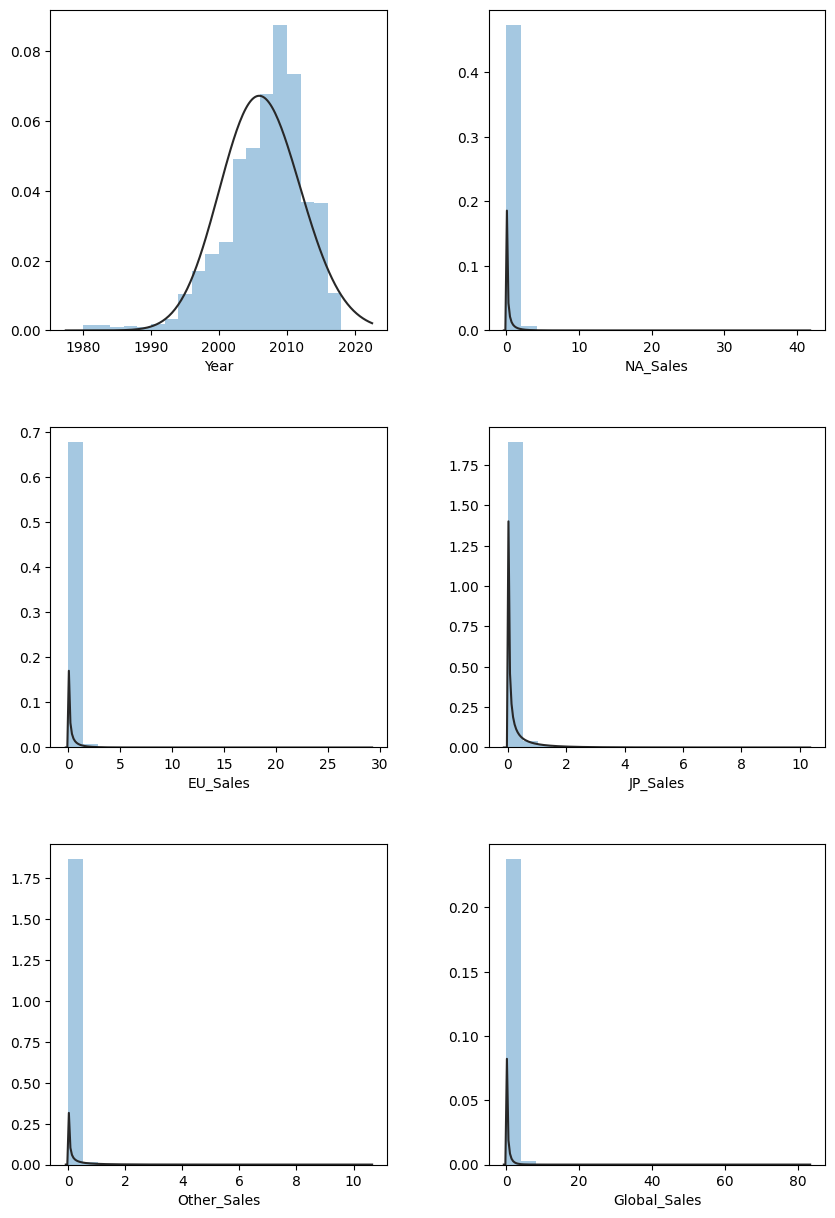

In [44]:
# Histograma
dataset.hist(figsize = (10,15))

sales_columns = ['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
  plt.subplot(3,2,i+1)
  sns.distplot(dataset[column], bins=20, kde=False, fit=stats.gamma)
plt.show()

Aqui ja podemos observar algumas tendencias. o Campo year ( ano de lan√ßamento ) podemos observar que o grafico esta exponencial. Portanto os jogos possui tendencia a serem lan√ßados no periodo de 2009 a 2010 aproximadamente...


O Gr√°fico de Densidade, ou Density Plot, √© bem parecido com o histograma, mas com uma visualiza√ß√£o um pouco diferente. Com ele, pode ser mais f√°cil identificar a distribui√ß√£o do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

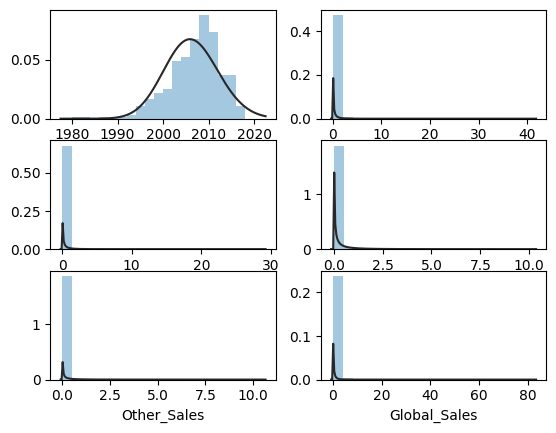

In [45]:
# Density Plot
sales_columns = ['Year','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for i, column in enumerate(sales_columns):
  plt.subplot(3,2,i+1)
  sns.distplot(dataset[column], bins=20, kde=False, fit=stats.gamma)
plt.show()

Vamos agora trabalhar com boxplots.


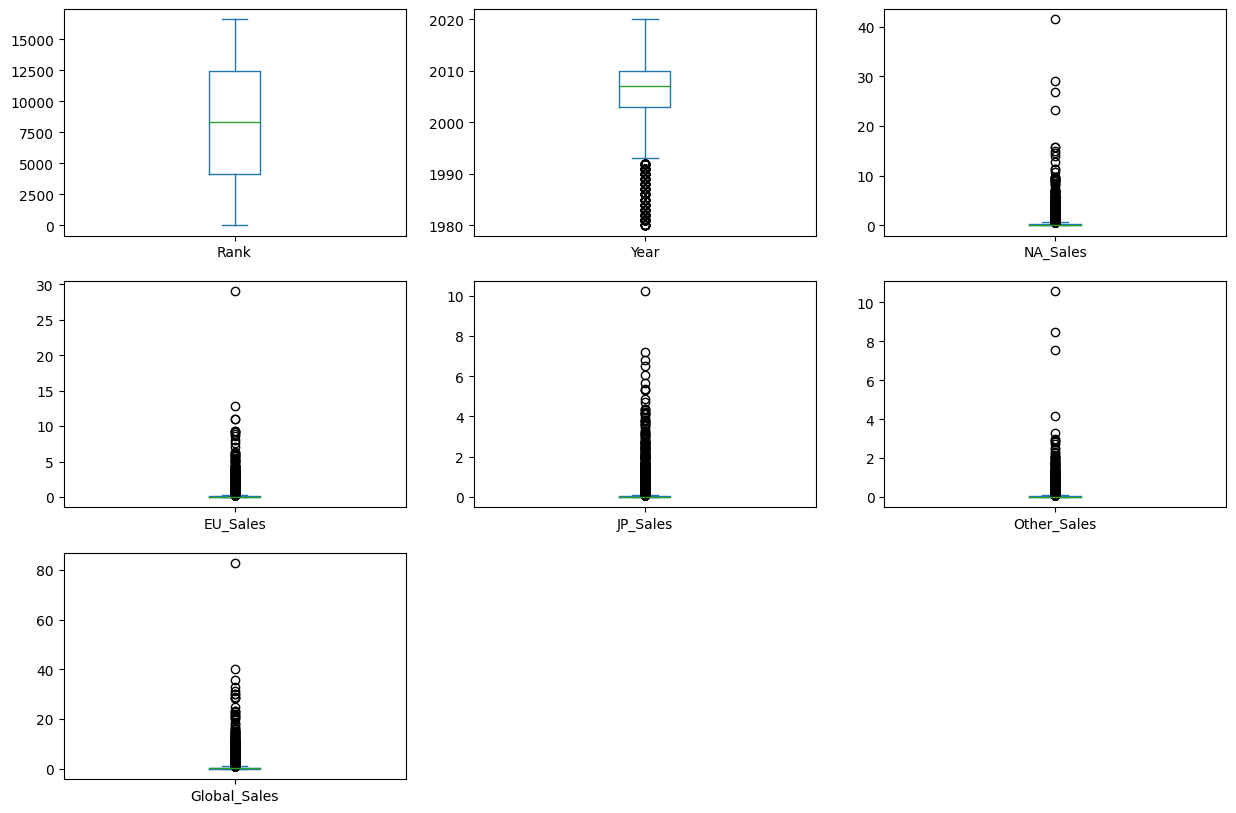

In [46]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

A seguir iremos analisar outros graficos pertinentes e que aprendemos ao longo da Sprint. Neles s√£o possivel analisar diversos outros casos como o grafico de barras :

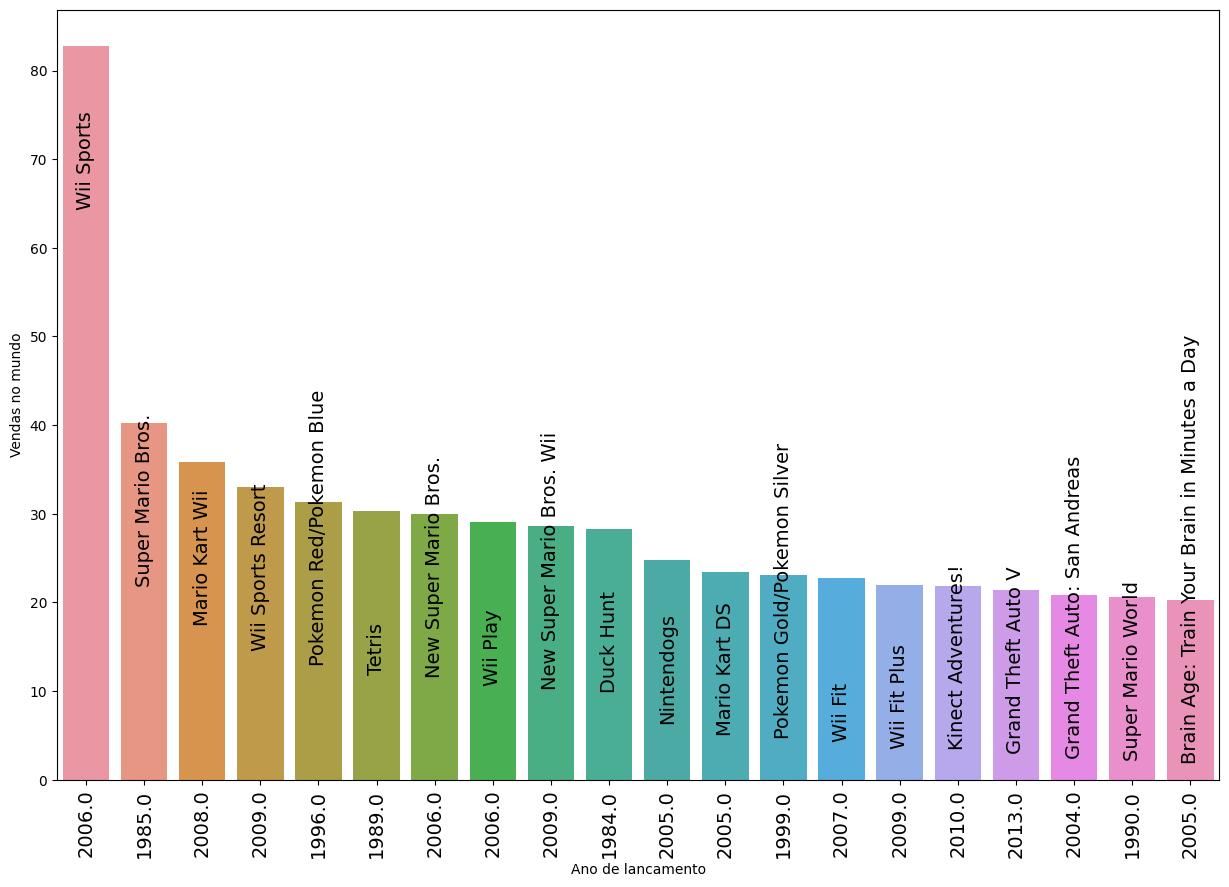

In [47]:
top_game_sale = dataset.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
# top_game_sale


name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)


plt.figure(figsize=(15, 10))
g = sns.barplot(x='Name', y='Global_Sales', data=top_game_sale)
index = 0
for value in top_game_sale['Global_Sales']:
    g.text(index, value - 18, name[index], color='#000', size=14, rotation= 90, ha="center")
    index += 1

plt.xticks(y, top_game_sale['Year'], fontsize=14, rotation=90)
plt.xlabel('Ano de lancamento')
plt.ylabel('Vendas no mundo')
plt.show()



Este grafico apresenta os 20 jogos mais vendidos no mundo na horizontal o ano de lancamento (coluna YEAR) e na vertical as Vendas Globais (campo Global_sales)

A seguir as editoras que mais venderam tamb√©m podem ser analisadas


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Midway Games'),
  Text(18, 0, '505 Games'),
  Text(19, 0, 'Microsoft Game Studios')])

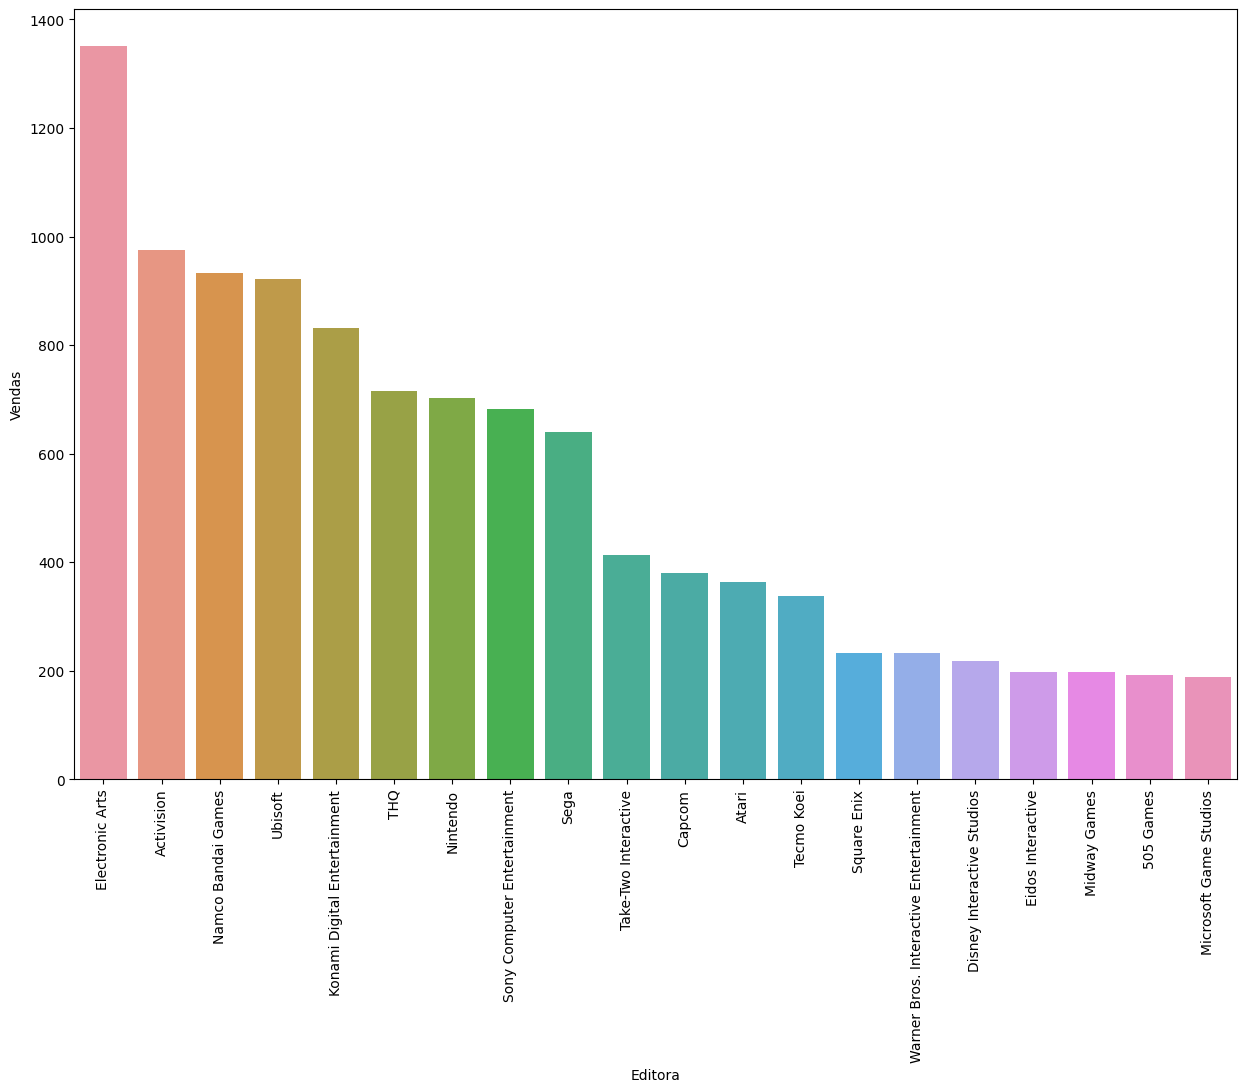

In [48]:
top_publisher = dataset.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
# top_publisher

plt.figure(figsize=(15, 10))
sns.countplot( x="Publisher",data=dataset, order = dataset.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xlabel('Editora')
plt.ylabel('Vendas')
plt.xticks(rotation=90)

Usaremos agora um grafico de pizza para analisarmos as regioes que mais venderam jogos no mundo. Veja a seguir:

([<matplotlib.patches.Wedge at 0x781380eb9d50>,
 [Text(-1.0997117266962277, 0.025181703016309925, 'NA_Sales'),
  Text(0.7981571088480199, -0.7569314563389279, 'EU_Sales'),
  Text(0.935642530069744, 0.5784229040457237, 'JP_Sales'),
  Text(0.3051488492741687, 1.0568274124882695, 'Other_Sales')],
 [Text(-0.5998427600161241, 0.013735474372532685, '49.3%'),
  Text(0.4353584230080108, -0.412871703457597, '27.3%'),
  Text(0.510350470947133, 0.3155034022067583, '14.5%'),
  Text(0.16644482687681925, 0.5764513159026924, '8.9%')])

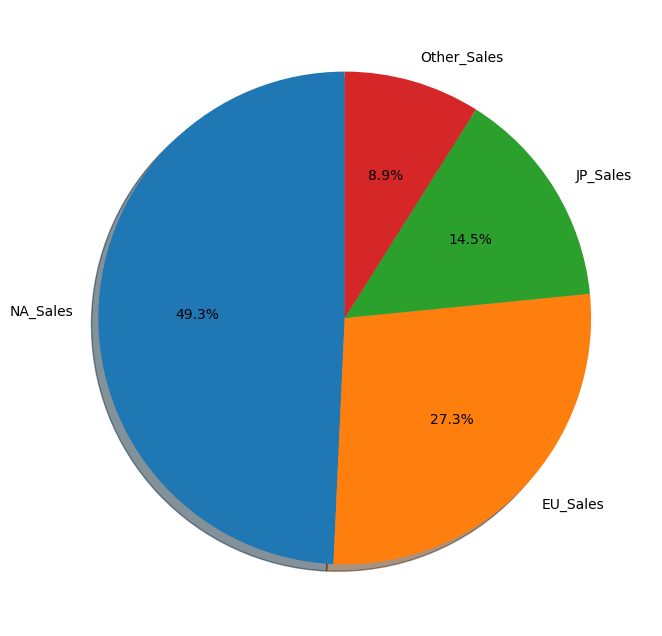

In [49]:
top_sale_reg = dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "regiao", 0: "vendas"})
top_sale_reg

labels = top_sale_reg['regiao']
sizes = top_sale_reg['vendas']

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

America do norte compoe quase 50% das vendas

<font size = '4'>3.3. Visualiza√ß√µes Multimodais</font>

Ao visualizar as correla√ß√µes entre os atributos atrav√©s da matriz de correla√ß√£o, perceberemos que parece haver alguma estrutura na ordem dos atributos. O azul ao redor da diagonal sugere que os atributos que est√£o pr√≥ximos um do outro s√£o geralmente mais correlacionados entre si. Os vermelhos tamb√©m sugerem alguma correla√ß√£o negativa moderada, a medida que os atributos

Vamos agora verificar a covari√¢ncia entre as vari√°veis num√©ricas do dataset. A covari√¢ncia representa como duas vari√°veis num√©ricas est√£o relacionadas. Existem v√°rias formas de calcular a correla√ß√£o entre duas vari√°veis, como por exemplo, o coeficiente de correla√ß√£o de Pearson, que pode ser:

    Pr√≥ximo de -1 : h√° uma correla√ß√£o negativa entre as vari√°veis,
    Pr√≥ximo de +1: h√° uma correla√ß√£o positiva entre as vari√°veis.
    0: n√£o h√° correla√ß√£o entre as vari√°veis.

OBS: Esta informa√ß√£o √© relevante porque alguns algoritmos como regress√£o linear e regress√£o log√≠stica podem apresentar problemas de performance se houver atributos altamente correlacionados. Vale a pena consultar a documenta√ß√£o do algoritmo para verificar se algum tipo de tratamento de dataset √© necess√°rio.

Falamos anteriormente da import√¢ncia da correla√ß√£o entre os atributos, e agora iremos visualizar esta informa√ß√£o em formato gr√°fico. A matriz de correla√ß√£o exibe graficamente a correla√ß√£o entre os atributos num√©ricos do dataset.est√£o mais distantes um do outro na ordena√ß√£o.

<Axes: >

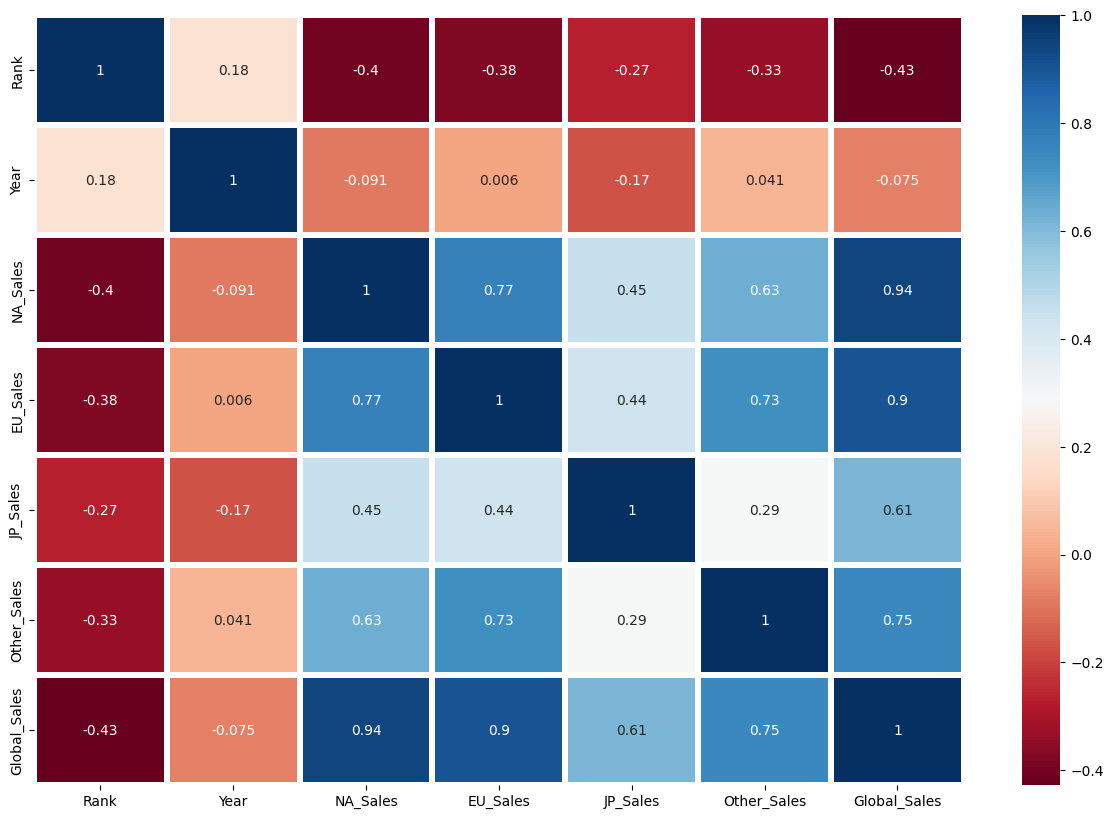

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), cmap = "RdBu", annot=True, linewidth=3)

√© possivel observar que a NA_SALES E EU_SALES tem muito efeito sobre o campo GLOBAL_SALES. Portanto, NA_SALES e EU_SALES se correlacionam para implicar no resultado do GLOBAL_SALES.

Por sua vez, o gr√°fico de dispers√£o (scatter plot) mostra o relacionamento entre duas vari√°veis.

In [ ]:
# Scatter Plot com Seaborn - Varia√ß√£o 1

plt.figure(figsize=(15,10))
data_pair = dataset.loc[:,["Year","Platform", "Genre", "NA_Sales","EU_Sales", "Other_Sales"]]
data_pair


sns.pairplot(data_pair, hue='Genre')

<font size = '6' > 4. Pr√©-Processamento de dados </font>

Nesta etapa, poder√≠amos realizar diversas opera√ß√µes de prepara√ß√£o de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transforma√ß√µes como one-hot-encoding, sele√ß√£o de caracter√≠sticas (feature selection), entre outras n√£o mostradas neste notebook.
<br><br>

<font size = '4' > 4.1. Tratamento de Missings e Limpeza </font>





In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

Neste Dataset n√£o temos muitos valores faltantes. Isso significa que n√£o estamos perdendo muita informa√ß√£o. Este √© um bom exemplo de um conjunto de dados prontos para serem analisados

Iremos agora tratar os dados da venda. No dataset possuiamos algumas vendas onde estao zeradas no grafico implicando em sujeira na informa√ß√£o para isso iremos realizar uma copia:


In [ ]:
data_hist_log = dataset.copy()

In [ ]:
data_hist_log = data_hist_log[data_hist_log.NA_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.EU_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Other_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.JP_Sales != 0]
data_hist_log = data_hist_log[data_hist_log.Global_Sales != 0]

In [ ]:
plt.figure(figsize=(15,10))
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, column in enumerate(sales_columns):
    plt.subplot(3,2,i+1)
    sns.distplot(np.log(data_hist_log[column]), bins=20, kde=False, fit=stats.gamma)

Agora podemos ver sua assimetria e tend√™ncia central.

A seguir tamb√©m iremos observar a matriz de nulidades do dataset

In [ ]:
# salvando um NOVO dataset para tratamento de missings (cuidado para n√£o sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset ir√° conter todas as colunas
atributos = dataset[col[0:11]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualiza√ß√£o matricial da nulidade do dataset
ms.matrix(atributos)

Iremos agora substituir todos os valores nulos das colunas :  NA_SALES, EU_Sales, JP_sales, Other_Sales por 0

In [ ]:
# substituindo os NaN  por 0
atributos['NA_Sales'].fillna(0, inplace=True)
atributos['EU_Sales'].fillna(0, inplace=True)
atributos['JP_Sales'].fillna(0, inplace=True)
atributos['Other_Sales'].fillna(0, inplace=True)

# exibindo visualiza√ß√£o matricial da nulidade do dataset
ms.matrix(atributos)

A coluna Year iremos colocar a informa√ß√£o : "Ano desconhecido"
e na coluna Publisher iremos colocar a informa√ß√£o: "Desconhecido"

In [ ]:
atributos['Year'].fillna('Ano desconhecido', inplace=True)
atributos['Publisher'].fillna('Desconhecido', inplace=True)
# exibindo visualiza√ß√£o matricial da nulidade do dataset
ms.matrix(atributos)

Pronto, dados tratados üëå

<font size = '6' > Conclus√£o </font>

Neste MVP foi poss√≠vel visualizar de forma dinamica e pratica como os dados sao valiosos para se entender diversas informa√ß√µes. Atraves de conceitos e tecnicas de varios campos de pesquisa como estatistica, visualiza√ß√£o da informa√ß√£o e ate programa√ß√£o, √© possivel obter novos conhecimentos sobre determinado assunto. O uso do pacote Panda √© muito completo quando se trata dados

Iniciamos esse Notebook com uma vis√£o geral dos dados, identificando as principais caracter√≠sticas do dataset 'videogames sales', tais como plataformas, g√™neros e regi√µes de venda. Utilizando gr√°ficos de pizza, pudemos visualizar a distribui√ß√£o percentual das vendas entre as diferentes plataformas, proporcionando insights valiosos sobre a popularidade relativa de cada uma.

A utiliza√ß√£o de histogramas permitiu-nos explorar as distribui√ß√µes de vendas globais, oferecendo uma compreens√£o mais aprofundada das faixas de vendas mais comuns. Essa an√°lise revelou padr√µes interessantes sobre os jogos que dominam o mercado e destacou a diversidade de prefer√™ncias dos consumidores.

Concluo tamb√©m que a ind√∫stria de videogames √© din√¢mica e em constante evolu√ß√£o. Plataformas emergentes, g√™neros inovadores e mudan√ßas nas prefer√™ncias do consumidor desempenham um papel fundamental na moldagem do cen√°rio atual. A compreens√£o dessas tend√™ncias √© crucial para desenvolvedores, distribuidores e entusiastas da ind√∫stria que buscam prosperar em um ambiente competitivo.

Em √∫ltima an√°lise, a an√°lise de dados proporciona uma lente valiosa para entender os videogames como um fen√¥meno cultural e econ√¥mico. Ao continuar a explorar e refinar nossas t√©cnicas anal√≠ticas, podemos continuar a desvendar os mist√©rios por tr√°s das prefer√™ncias dos jogadores e antecipar as futuras tend√™ncias dessa ind√∫stria vibrante.